Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility

In [8]:
#import pandas
import pandas as pd

#importing matplotlib and setting aesthetics of plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

#coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('coinmarketcap_06122017.csv')
dec6.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [9]:
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[["id","market_cap_usd"]]

# Counting the number of values
print(market_cap_raw.count())

id                1326
market_cap_usd    1031
dtype: int64


Discard the cryptocurrencies without a market capitalization

In [11]:
# Filtering out rows without a market capitalization
cap = market_cap_raw[market_cap_raw["market_cap_usd"]>0]

# Counting the number of values again
print(cap.count())

id                1031
market_cap_usd    1031
dtype: int64


How big is Bitcoin compared with the rest of the cryptocurrencies?

Text(0, 0.5, '% of total cap')

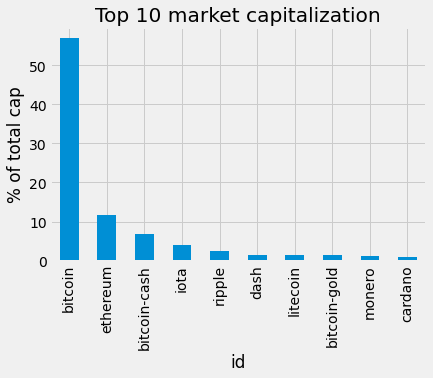

In [13]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap[:10].set_index("id")

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum())*100)

# Plotting the barplot with the title defined above
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE)

# Annotating the y axis with the label defined above
ax.set_ylabel(TOP_CAP_YLABEL)

Making the plot easier to read and more informative

Text(0.5, 0, '')

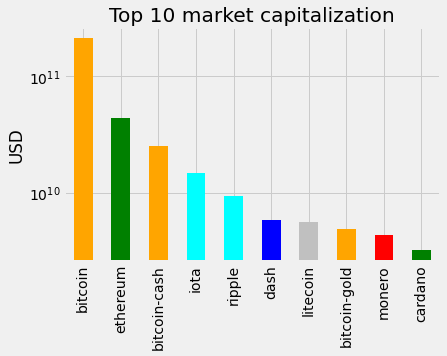

In [14]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis
ax = cap10.market_cap_usd.plot.bar(title=TOP_CAP_TITLE, logy=True, color=COLORS)

# Annotating the y axis with 'USD'
ax.set_ylabel('USD')

# Final touch! Removing the xlabel as it is not very informative
ax.set_xlabel('')

What is going on?! Volatility in cryptocurrencies

In [15]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[["id", "percent_change_24h", "percent_change_7d"]]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index("id").dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values("percent_change_24h")

# Checking the first few rows
print(volatility.head())

               percent_change_24h  percent_change_7d
id                                                  
flappycoin                 -95.85             -96.61
credence-coin              -94.22             -95.31
coupecoin                  -93.93             -61.24
tyrocoin                   -79.02             -87.43
petrodollar                -76.55             542.96


Well, we can already see that things are a bit crazy

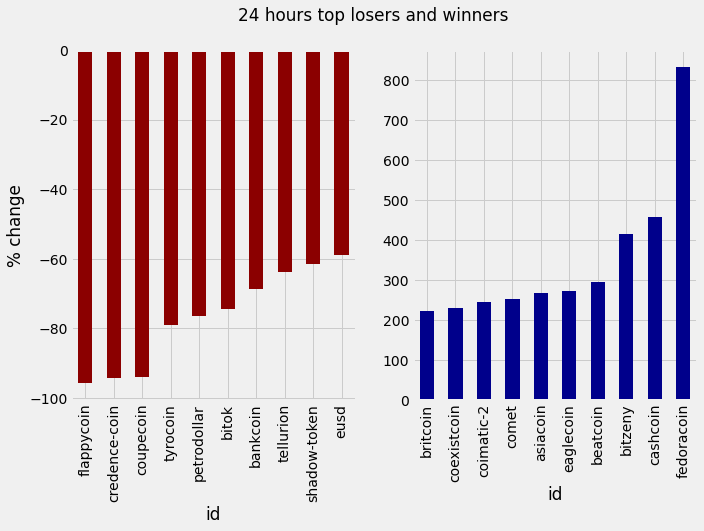

In [20]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series,title):
    
    # Making the subplot and the figure for two side by side plots
    fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    ax.set_ylabel('% change')
    
    # Same as above, but for the top 10 winners
    ax = volatility_series[-10:].plot.bar(color='darkblue',ax=axes[1])
    
    # Returning this for good practice, might use later
    return fig, axes

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

Ok, those are... interesting. Let's check the weekly Series too

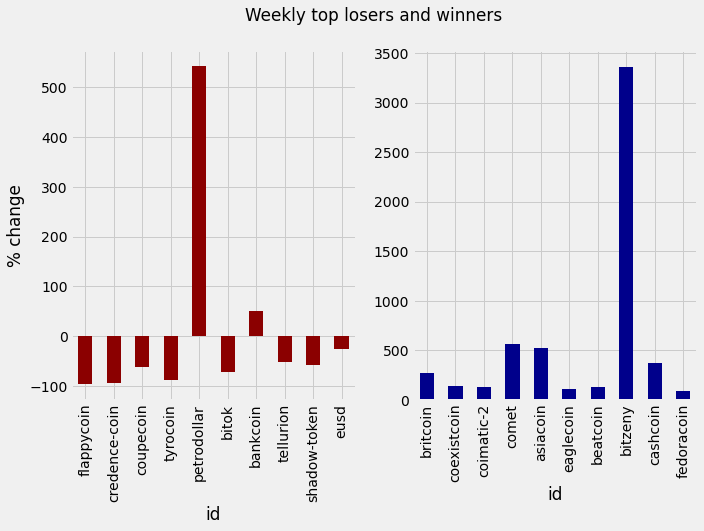

In [21]:
# Sorting in ascending order
volatility7d = volatility.sort_values("percent_change_7d")

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fiog, ax = top10_subplot(volatility.percent_change_7d, WTITLE)

How small is small?

In [22]:
# Selecting everything bigger than 10 billion
largecaps = cap[cap["market_cap_usd"]>10000000000]

# Printing out largecaps
print(largecaps)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


Most coins are tiny

<BarContainer object of 3 artists>

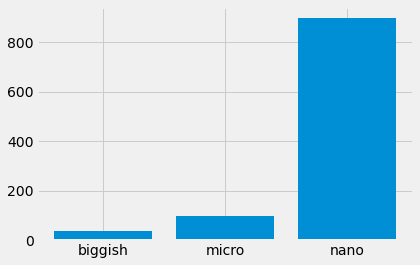

In [31]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount("market_cap_usd > 3E+8")

# Same as above for micro ...
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# ... and for nano
nano =  capcount("market_cap_usd < 5E+7")

# Making a list with the 3 counts
values = [biggish, micro, nano]

# Plotting them with matplotlib 
plt.bar(range(len(values)), values, tick_label=LABELS)